<a href="https://colab.research.google.com/github/munmoom/Crawler_collaborate/blob/main/%ED%95%A9%EC%B9%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlopen
url='https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=FILE&keyword=%EC%BD%94%EB%A1%9C%EB%82%98&detailKeyword=&publicDataPk=&recmSe=&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=_score&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode='
htmlData=urlopen(url).read()
htmlData=htmlData.decode('utf8')
from bs4 import BeautifulSoup as bs
html=bs(htmlData,'html.parser')

ul = html.select('#fileDataList > div.result-list > ul > li')

who = []
for item in ul:
  num = item.find_all("span", class_='tit')
  who.append(num)

import re
ti=[]
who = who[0]

for a in range(4):
    tit = who[a]
    tit = str(tit)
    tit = re.sub('<.+?>','', tit, a).strip()
    ti.append(tit)

string = ti[1]
string = string[0:3]
del ti[1]
ti.insert(1, string)

whole = []
for item in ul:
  num = item.find_all("span", class_='data')
  whole.append(num)


import re
lis=[]
for i in range(10):
  ko = whole[i]
  for a in range(4):
    li = ko[a]
    li = str(li)
    li = re.sub('<.+?>','', li, a).strip()
    lis.append(li)

for i in range(10):
  k = 2+4*i-1
  date = str(lis[k])[0:10]
  del lis[k]
  lis.insert(k, date)





from urllib.request import urlopen
url='https://www.data.go.kr/tcs/dss/selectDataSetList.do?dType=FILE&keyword=%EC%BD%94%EB%A1%9C%EB%82%98&detailKeyword=&publicDataPk=&recmSe=&detailText=&relatedKeyword=&commaNotInData=&commaAndData=&commaOrData=&must_not=&tabId=&dataSetCoreTf=&coreDataNm=&sort=_score&relRadio=&orgFullName=&orgFilter=&org=&orgSearch=&currentPage=1&perPage=10&brm=&instt=&svcType=&kwrdArray=&extsn=&coreDataNmArray=&pblonsipScopeCode='
htmlData=urlopen(url).read()
htmlData=htmlData.decode('utf8')
from bs4 import BeautifulSoup as bs
html=bs(htmlData,'html.parser')
ul=html.select('#fileDataList > div.result-list > ul')
head = []
for item in ul:
  title = item.find_all("span", class_='title')
  head.append(title)

import re
ABC=[]
header = head[0]
for i in range(10):
  no=header[i]
  no=str(no)
  no = re.sub('<.+?>', '', no, i).strip()
  for k in range(1,3):
    no = re.sub('<.+?>', '', no, k).strip()

  no = re.sub('<.+?>', '', no, 2).strip()
  ABC.append(no)







import pandas as pd





print(ti)
print(lis)
print(ABC)

fi = []
sec  = []
th  = []
fo  = []

for i in range(10):
 fi.append(lis[4*i])
 sec.append(lis[1+4*i])
 th.append(lis[2+4*i])
 fo.append(lis[3+4*i])

print(fi)
print(sec)
print(th)
print(fo)

A=[]
B=[]

for i in range(10):
  ite = int(th[i])
  A.append(ite)

for i in range(10):
  ite = int(fo[i])
  B.append(ite)


df = pd.DataFrame()
df['제목']=ABC
df['제공기관']=fi
df['수정일']=sec
df['조회수']=A
df['다운로드']=B

df.to_csv('corona.csv',index=False)

df


['제공기관', '수정일', '조회수', '다운로드']
['한국언론진흥재단', '2021-08-25', '20049', '39972', '서울특별시 강동구', '2020-09-23', '2868', '765', '한국언론진흥재단', '2021-03-17', '3525', '1059', '한국언론진흥재단', '2021-03-17', '11669', '4456', '부산광역시 수영구', '2022-04-26', '1275', '191', '서울특별시 용산구', '2022-03-17', '248', '53', '강원도', '2022-03-28', '4791', '1320', '서울특별시 용산구', '2022-03-17', '2462', '770', '전라북도 고창군', '2022-04-01', '94', '41', '충청남도 계룡시', '2022-03-24', '82', '11']
['한국언론진흥재단_뉴스빅데이터_메타데이터_코로나', '서울특별시 강동구_코로나동별현황', '한국언론진흥재단_코로나19이후국민의일상변화조사_포스트 코로나 사회에 대한 전망', '한국언론진흥재단_코로나19이후국민의일상변화조사_코로나19로 인한 감정 변화', '부산광역시 수영구_코로나 확진자 수', '서울특별시 용산구_코로나19사망자', '강원도_코로나19 확진자 현황', '서울특별시 용산구_코로나19확진자', '전라북도 고창군_코로나19 현황', '충청남도 계룡시_코로나19 확진자']
['한국언론진흥재단', '서울특별시 강동구', '한국언론진흥재단', '한국언론진흥재단', '부산광역시 수영구', '서울특별시 용산구', '강원도', '서울특별시 용산구', '전라북도 고창군', '충청남도 계룡시']
['2021-08-25', '2020-09-23', '2021-03-17', '2021-03-17', '2022-04-26', '2022-03-17', '2022-03-28', '2022-03-17', '2022-04-01', '2022-03-24']
['20049', '2868', '3525', 

제목       제공기관         수정일    조회수  \
0                    한국언론진흥재단_뉴스빅데이터_메타데이터_코로나   한국언론진흥재단  2021-08-25  20049   
1                            서울특별시 강동구_코로나동별현황  서울특별시 강동구  2020-09-23   2868   
2  한국언론진흥재단_코로나19이후국민의일상변화조사_포스트 코로나 사회에 대한 전망   한국언론진흥재단  2021-03-17   3525   
3    한국언론진흥재단_코로나19이후국민의일상변화조사_코로나19로 인한 감정 변화   한국언론진흥재단  2021-03-17  11669   
4                          부산광역시 수영구_코로나 확진자 수  부산광역시 수영구  2022-04-26   1275   
5                           서울특별시 용산구_코로나19사망자  서울특별시 용산구  2022-03-17    248   
6                             강원도_코로나19 확진자 현황        강원도  2022-03-28   4791   
7                           서울특별시 용산구_코로나19확진자  서울특별시 용산구  2022-03-17   2462   
8                            전라북도 고창군_코로나19 현황   전라북도 고창군  2022-04-01     94   
9                           충청남도 계룡시_코로나19 확진자   충청남도 계룡시  2022-03-24     82   

    다운로드  
0  39972  
1    765  
2   1059  
3   4456  
4    191  
5     53  
6   1320  
7    770  
8     41  
9     11

In [29]:
%config lnlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')
mpl. font_manager._rebuild()

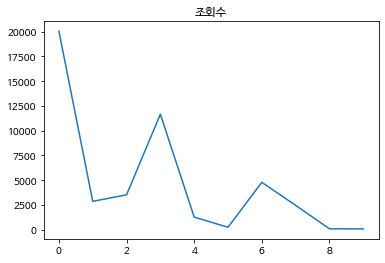

In [6]:
import matplotlib.pyplot as plt
df['조회수'].plot()
plt.title('조회수')
plt.show()

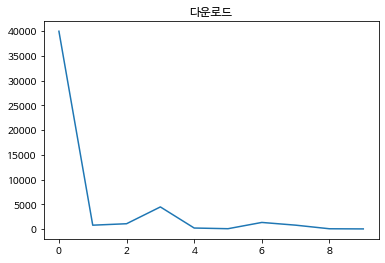

In [5]:
df['다운로드'].plot()
plt.title('다운로드')
plt.show()